Student id: m.kirankumar.2@gmail.com<br/>
Date: May 23, 2022

**7. For this problem, use the population dataset, and perform the following:**<br/>
1.	EDA on the time series to find trends and seasonality.<br/>
2.	Forecast the population on the given dataset for the next 6 months. 


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load popdata.csv into DataFrame

In [195]:
population = pd.read_csv('popdata.csv')

Population information of data

In [196]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   816 non-null    float64
 1   date    816 non-null    object 
dtypes: float64(1), object(1)
memory usage: 12.9+ KB


**date is of object/string type. Thus it requires to be type casted to pandas datatime**

In [197]:
population['date'] = pd.to_datetime(population['date'])
population = population.set_index('date')

In [198]:
population.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 816 entries, 1952-01-01 to 2019-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   816 non-null    float64
dtypes: float64(1)
memory usage: 12.8 KB


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

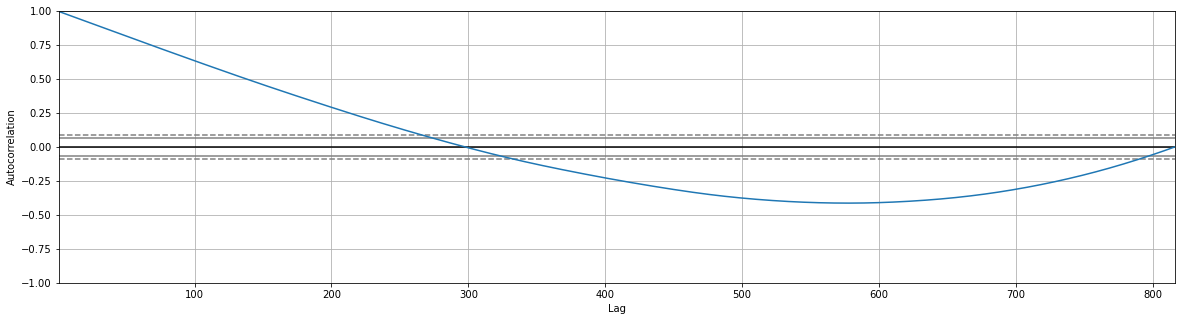

In [201]:
pd.plotting.autocorrelation_plot(population)

Let's plot the Population value column graph

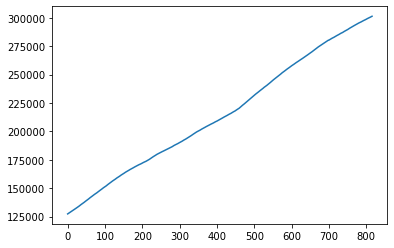

In [63]:
plt.plot(population['value'])
plt.show()

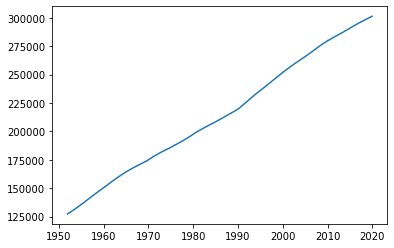

In [64]:
plt.plot(population['date'],population['value'])
plt.show()

Trend estimation using pandas rolling function (for duration of month) <br/>
Basically moving averages(MA)
<br/>
<br/>
Note : rolling(1) is for  1 month

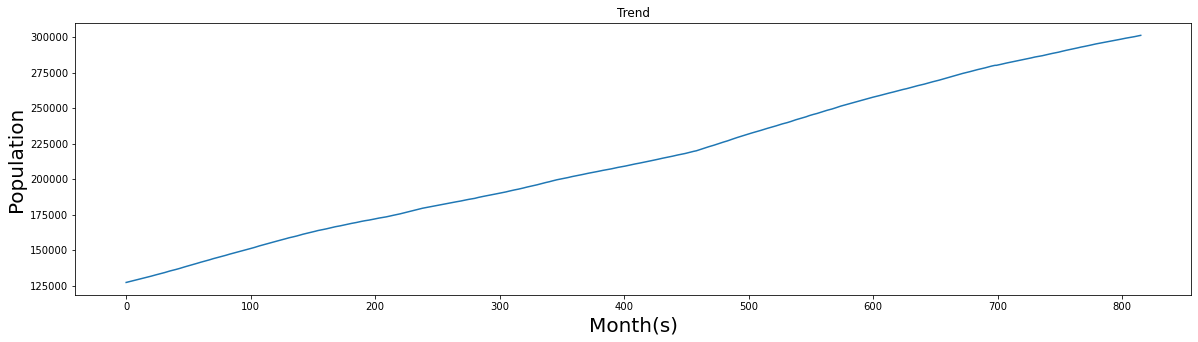

In [65]:
pop_val = population.value.rolling(1).mean()
plt.figure(figsize=(20,5))
plt.plot(pop_val)
plt.xlabel("Month(s)", fontsize=20)
plt.ylabel("Population",fontsize=20)
plt.title("Trend")
plt.show()

Seasonality

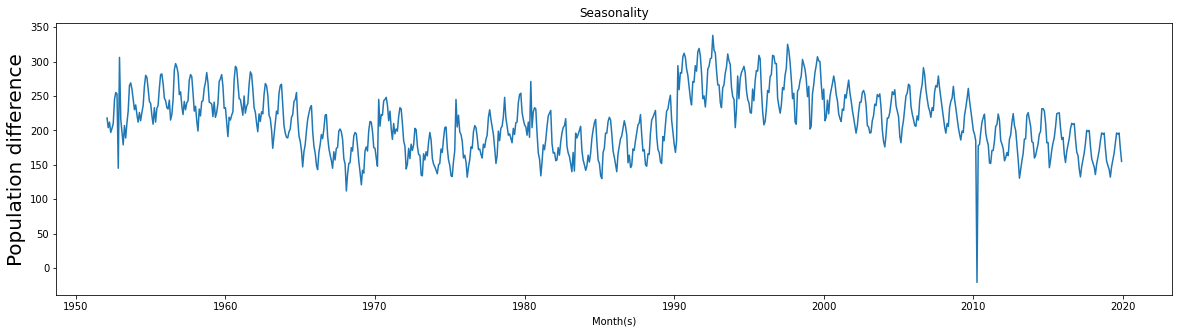

In [203]:
seasonality =population.value.diff(1)
plt.figure(figsize = (20, 5))
plt.plot(seasonality)
plt.xlabel("Month(s)")
plt.ylabel("Population difference",fontsize=20)
plt.title("Seasonality")
plt.show()

Now, Lets plot ACF(Auto Correlation)

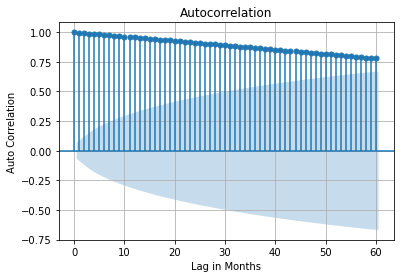

In [67]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(population['value'], lags=60)
plt.xlabel('Lag in Months')
plt.ylabel("Auto Correlation")
plt.grid()
plt.show()

**Inference :** Clearly from the above auto correlation plot, we can fairly conclude that for 10 months, the change in auto correlation is significantly low (as good as unchanged) thus there is a better scope for predictability (with error in predction minimal or at least in acceptable range) of population for 6 Month scope

In [15]:
#ARIMA

In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    population['date'], population['value'], test_size=0.20, random_state=42)

In [115]:
population

value       date
0    127299.000 1952-01-01
1    127517.000 1952-02-01
2    127721.000 1952-03-01
3    127933.000 1952-04-01
4    128130.000 1952-05-01
..          ...        ...
811  300581.333 2019-08-01
812  300775.872 2019-09-01
813  300972.035 2019-10-01
814  301144.949 2019-11-01
815  301299.946 2019-12-01

[816 rows x 2 columns]

In [100]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  816
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -5114.456
Date:                Thu, 19 May 2022   AIC                          10232.912
Time:                        17:18:45   BIC                          10242.318
Sample:                             0   HQIC                         10236.522
                                - 816                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.8953      0.014     62.943      0.000       0.867       0.923
sigma2       1.21e+04    325.092     37.231      0.000    1.15e+04    1.27e+04
===================================================================================
Ljung-Box (L1) (Q):                 182.57   Jarque-Bera (JB):            371132.28
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -4.76
Prob(H) (two-sided):                  0.01   Kurtosis:                       107.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [98]:
from statsmodels.tsa.seasonal import seasonal_decompose
population1 = population[['date', 'value']]
population1 =population1.dropna()
population1['date'] = pd.to_datetime(population1['date'])
population1 = population1.set_index('date').asfreq('d')

In [107]:
result=seasonal_decompose(population1.dropna(), model='ad')
from pylab import rcParams
rcParams['figure.figsize'] = 20,5

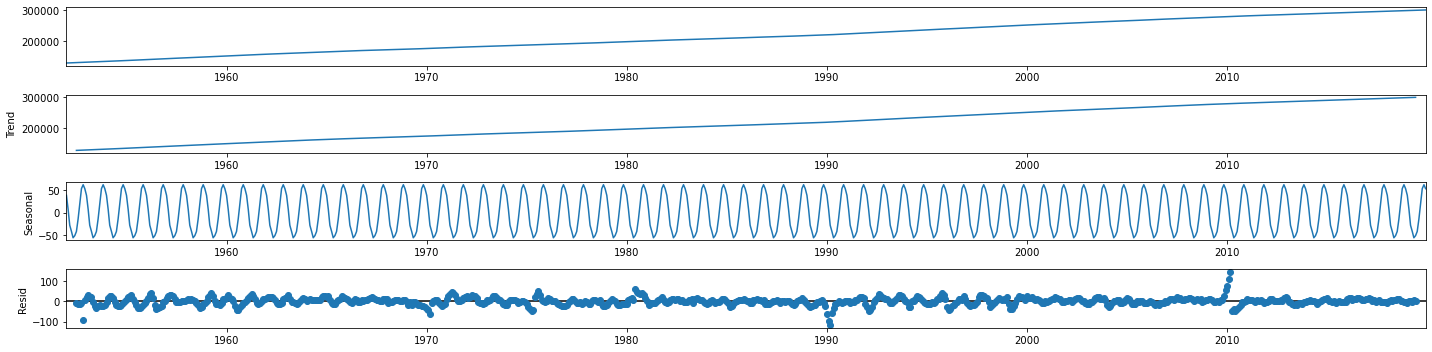

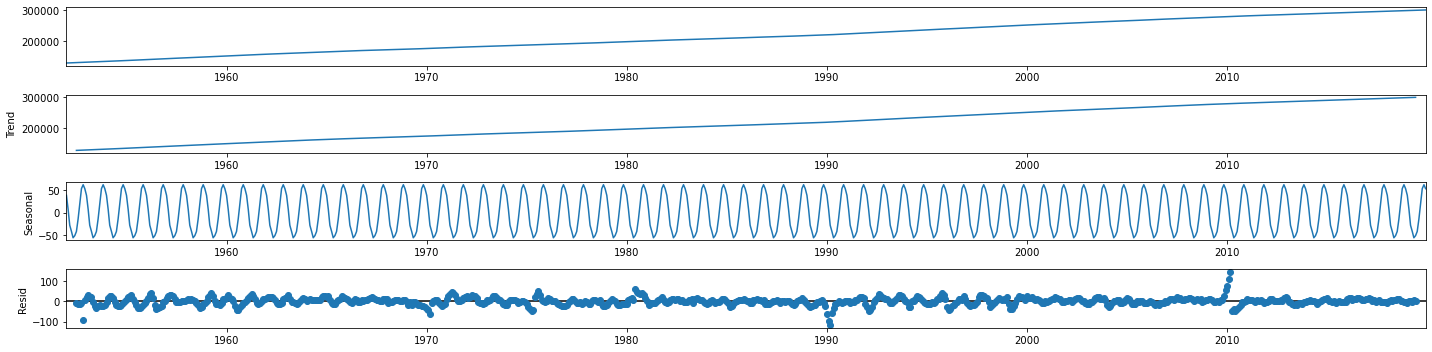

In [108]:
result.plot()

In [125]:
population

value
date                
1952-01-01  127299.0
1952-01-02       NaN
1952-01-03       NaN
1952-01-04       NaN
1952-01-05       NaN
...              ...
2019-11-27       NaN
2019-11-28       NaN
2019-11-29       NaN
2019-11-30       NaN
2019-12-01  301299.0

[24807 rows x 1 columns]

In [166]:
pop1 =pd.read_csv('popdata.csv')
pop1.tail(1)['value']*1000

815    301299946.0
Name: value, dtype: float64

In [157]:

pop1['date'] = pd.to_datetime(pop1['date'])
pop1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   value   816 non-null    float64       
 1   date    816 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.9 KB


In [158]:
pop1 = pop1.set_index('date').asfreq('d')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

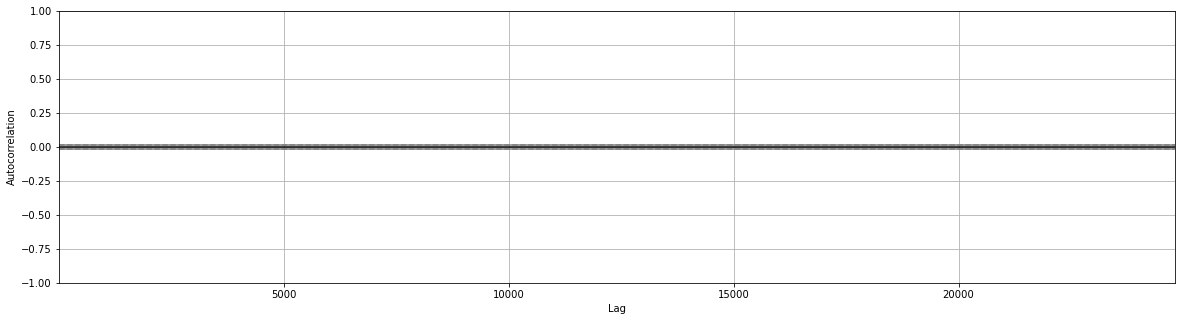

In [159]:
pd.plotting.autocorrelation_plot(pop1)

In [161]:
pop1.tail()

value
date                  
2019-11-27         NaN
2019-11-28         NaN
2019-11-29         NaN
2019-11-30         NaN
2019-12-01  301299.946